<a href="https://colab.research.google.com/github/krutikacoding/curly-robot/blob/main/Krutika_Employee_Attrition_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [252]:
#packages import
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import rc
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_selection import chi2
import scipy.stats as stats

from scipy.stats import zscore
from sklearn import metrics
from sklearn.metrics import classification_report


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.feature_selection import VarianceThreshold

In [253]:
data= pd.read_csv("/content/Attrition data.csv")

#Reviewing Data

In [254]:
data.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [255]:
data.tail()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
4405,4406,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,Female,...,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,4407,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,Male,...,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,4408,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,Male,...,5.0,4,4,1,2,1.0,3.0,3.0,3,4
4408,4409,42,No,Travel_Rarely,Sales,18,2,Medical,1,Male,...,10.0,2,9,7,8,4.0,1.0,3.0,2,3
4409,4410,40,No,Travel_Rarely,Research & Development,28,3,Medical,1,Male,...,NaN,6,21,3,9,1.0,3.0,NaN,4,3


In [256]:
print("shape of the dataset:", data.shape)

shape of the dataset: (4410, 29)


In [257]:
data.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')

In [258]:
data.dtypes

EmployeeID                   int64
Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
JobInvolvement               int64
PerformanceRating   

#Data Cleaning



In [259]:
data.isnull().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

In [260]:
data.fillna(method="ffill", inplace=True)
data.isnull().sum()

EmployeeID                 0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
dtype: int64

In [261]:
data.dtypes

EmployeeID                   int64
Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
JobInvolvement               int64
PerformanceRating   

In [262]:
data.NumCompaniesWorked= data.NumCompaniesWorked.astype("int64")
data.TotalWorkingYears= data.TotalWorkingYears.astype("int64")
data.EnvironmentSatisfaction= data.EnvironmentSatisfaction.astype("int64")
data.JobSatisfaction= data.JobSatisfaction.astype("int64")
data.WorkLifeBalance= data.WorkLifeBalance.astype("int64")

In [263]:
data.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')

In [264]:
data.dtypes

EmployeeID                  int64
Age                         int64
Attrition                  object
BusinessTravel             object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EmployeeCount               int64
Gender                     object
JobLevel                    int64
JobRole                    object
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
Over18                     object
PercentSalaryHike           int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
YearsAtCompany              int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
EnvironmentSatisfaction     int64
JobSatisfaction             int64
WorkLifeBalance             int64
JobInvolvement              int64
PerformanceRating           int64
dtype: object

In [265]:
#data= data.drop(data[data['Age'] == 0].index, inplace = True)

In [266]:
data.head(3)

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1,6,1,0,0,3,4,2,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6,3,5,1,4,3,2,4,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5,2,5,0,3,2,2,1,3,3


#Mapping data to numeric values

In [267]:
#mapping non-numeric values to numeric values
data_num = data.copy()

mapping = {"Yes": 1, "No": 0}
data_num['Attrition'] = data_num['Attrition'].map(mapping)
data_num['Over18'] = data_num['Over18'].map(mapping)
BusinessTravel_mapping = {"Travel_Rarely": 0, "Travel_Frequently": 1, "Non-Travel": 0}
data_num['BusinessTravel'] = data_num['BusinessTravel'].map(BusinessTravel_mapping)
Gender_mapping = {"Female": 1, "Male": 0}
data_num['Gender'] = data_num['Gender'].map(Gender_mapping)
marital_mapping = {"Married": 1, "Single": 0, "Divorced": 0}
data_num['MaritalStatus'] = data_num['MaritalStatus'].map(marital_mapping)

#data_num.head(3)

In [268]:
data_num.head()


,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,0,0,Sales,6,2,Life Sciences,1,1,...,1,6,1,0,0,3,4,2,3,3
1,2,31,1,1,Research & Development,10,1,Life Sciences,1,1,...,6,3,5,1,4,3,2,4,2,4
2,3,32,0,1,Research & Development,17,4,Other,1,0,...,5,2,5,0,3,2,2,1,3,3
3,4,38,0,0,Research & Development,2,5,Life Sciences,1,0,...,13,5,8,7,5,4,4,3,2,3
4,5,32,0,0,Research & Development,10,1,Medical,1,0,...,9,2,6,0,4,4,1,3,3,3


# EDA and Visualization

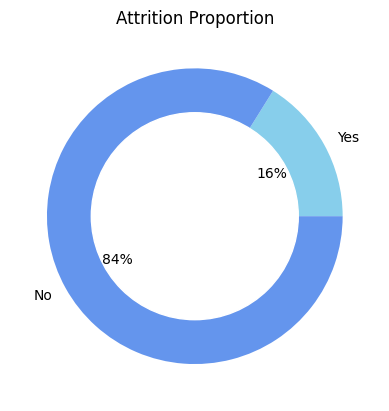

In [269]:
Y_count = len(data[data['Attrition'] == 'Yes'])
N_count = len(data[data['Attrition'] == 'No'])
names='Yes', 'No',
size=[Y_count,N_count]

att_circle= plt.Circle((0,0), 0.7, color='white')
plt.pie(size, labels= names, colors=['skyblue','cornflowerblue'], autopct='%1.0f%%')
#plt.pie(size, labels= names, colors=['lightcoral','cornflowerblue'],autopct='%1.0f%%')
p=plt.gcf()
p.gca().add_artist(att_circle)
plt.title("Attrition Proportion")
plt.show()

Text(0, 0.5, 'Count')

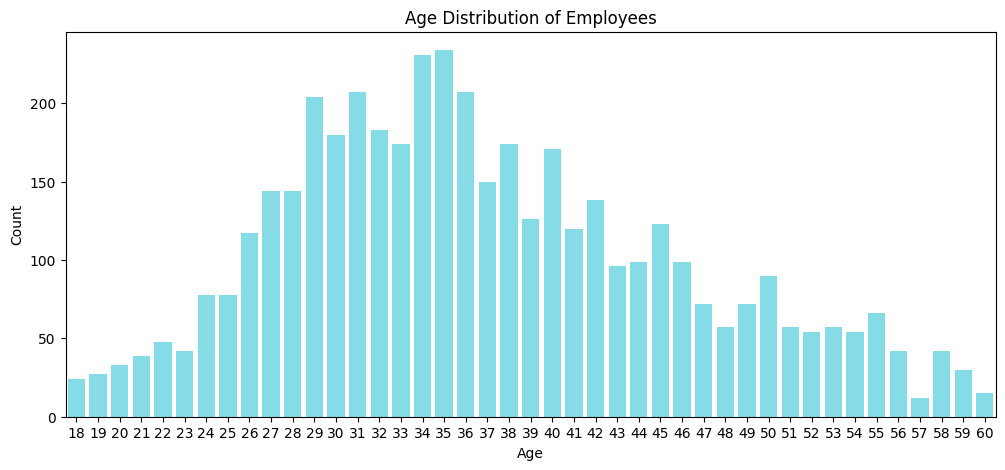

In [270]:
plt.figure(figsize=(12, 5))
x_age = sorted(data_num['Age'].value_counts().index)
sns.countplot(data=data_num, x='Age', order=x_age, palette=['#76E9F6'])
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Count')

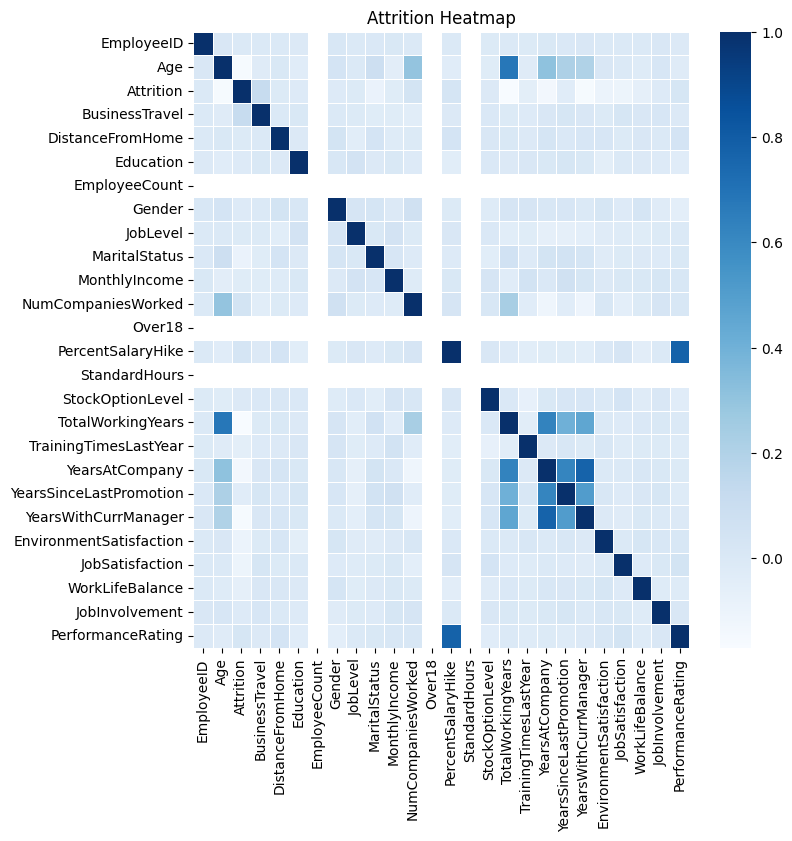

In [271]:
#fig = px.imshow(z, text_auto=True)

plt.subplots(figsize=(8,8))
corr = data_num.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap="Blues",linewidths=.5)
plt.title("Attrition Heatmap")
plt.show()

#Correlation Mapping

Job Satisfaction Vs. Attrition

<Figure size 1000x1000 with 0 Axes>

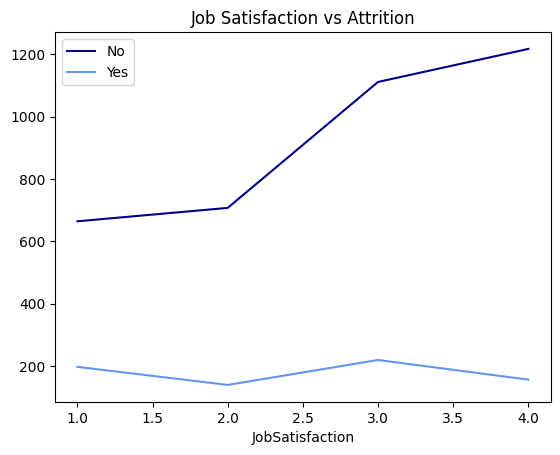

In [272]:
plt.figure(figsize=(10,10))
prd_gender= pd.crosstab(data['JobSatisfaction'], data['Attrition'])
ax=prd_gender.plot(kind='line')
plt.xticks(rotation=0)
plt.gca().get_lines()[0].set_color("darkblue")
plt.gca().get_lines()[1].set_color("cornflowerblue")
plt.title("Job Satisfaction vs Attrition")
plt.legend()
plt.show()

  Noticing employee behaviour using factors like Age, Years at the Company and the Number of Companies where they have worked

In [273]:
factors = data[['Age','YearsAtCompany','NumCompaniesWorked','Attrition']]
factors_melt = factors.melt(['Attrition'], var_name='cols',  value_name='vals')


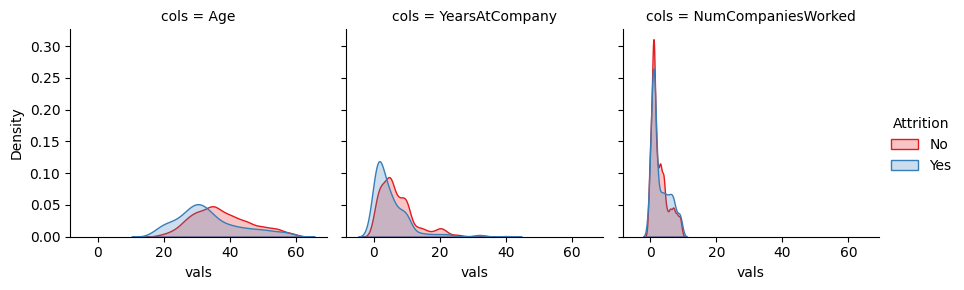

In [274]:
g = sns.FacetGrid(factors_melt, col='cols', hue="Attrition", palette="Set1")
g = (g.map(sns.distplot, "vals", hist=False, rug=False, kde_kws={"shade": True}).add_legend())

Checking relations between income and attrition

In [275]:
incatt = data[['MonthlyIncome','Attrition']]
incatt_melt = incatt.melt(['Attrition'], var_name='cols',  value_name='vals')

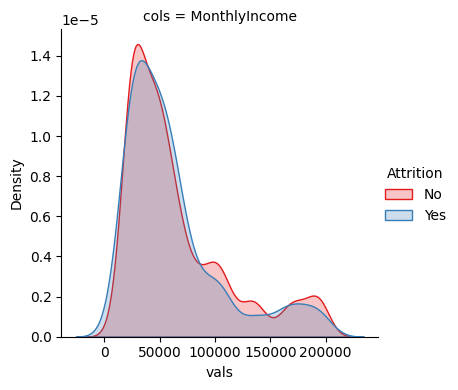

In [276]:
g = sns.FacetGrid(incatt_melt, col='cols', hue="Attrition", palette="Set1", height= 4)
g = (g.map(sns.distplot, "vals", hist=False, rug=False, kde_kws={"shade": True}).add_legend())

# Statistics of Attrition

Using p value between two markers to find if there is any relationship or relevance between that factor and employee attrition

In [277]:
df2= data.copy()
col = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']
encoder = LabelEncoder()
for col in data.columns:
    df2[col] = encoder.fit_transform(data[col])
df2.head()


,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,0,33,0,2,2,5,1,1,0,0,...,1,6,1,0,0,2,3,1,2,0
1,1,13,1,1,1,9,0,1,0,0,...,6,3,5,1,4,2,1,3,1,1
2,2,14,0,1,1,16,3,4,0,1,...,5,2,5,0,3,1,1,0,2,0
3,3,20,0,0,1,1,4,1,0,1,...,13,5,8,7,5,3,3,2,1,0
4,4,14,0,2,1,9,0,3,0,1,...,9,2,6,0,4,3,0,2,2,0


In [278]:
cat = ['Attrition','BusinessTravel','Department','Education','EducationField','Gender', 'NumCompaniesWorked', 'JobLevel','JobRole','MaritalStatus','NumCompaniesWorked','StockOptionLevel','TrainingTimesLastYear','EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance','JobInvolvement','PerformanceRating']
f_p_value = chi2(df2[cat],df2["Attrition"])

p_value = pd.Series(f_p_value[1])
p_value.index = cat
p_value.sort_values(ascending=False)


BusinessTravel             9.979489e-01
StockOptionLevel           6.641673e-01
JobInvolvement             5.755947e-01
JobLevel                   4.635222e-01
Education                  4.575835e-01
Gender                     4.465058e-01
PerformanceRating          1.528042e-01
Department                 1.324858e-01
JobRole                    4.576320e-02
WorkLifeBalance            2.714724e-02
TrainingTimesLastYear      1.145092e-02
EducationField             6.360036e-04
NumCompaniesWorked         2.439473e-05
NumCompaniesWorked         2.439473e-05
EnvironmentSatisfaction    2.646865e-08
JobSatisfaction            9.436892e-09
MaritalStatus              6.424208e-14
Attrition                  0.000000e+00
dtype: float64

In [279]:
cnt = 0
for i in p_value:
    if i > 0.05:
      #basic standard statistic of measurement, if p value is less than 0.05, we reject the null hypothesis
        print("There is no relationship between", p_value.index[cnt], "and Attrition:", i ,"\n")
    else:
        print("There is relationship", p_value.index[cnt], "and attrition:", i, "\n")
    cnt += 1


There is relationship Attrition and attrition: 0.0 

There is no relationship between BusinessTravel and Attrition: 0.9979489452875708 

There is no relationship between Department and Attrition: 0.13248581741535442 

There is no relationship between Education and Attrition: 0.45758354147957037 

There is relationship EducationField and attrition: 0.0006360036404903508 

There is no relationship between Gender and Attrition: 0.44650578050859024 

There is relationship NumCompaniesWorked and attrition: 2.4394731213485767e-05 

There is no relationship between JobLevel and Attrition: 0.4635222356771651 

There is relationship JobRole and attrition: 0.04576319613719553 

There is relationship MaritalStatus and attrition: 6.424208374700033e-14 

There is relationship NumCompaniesWorked and attrition: 2.4394731213485767e-05 

There is no relationship between StockOptionLevel and Attrition: 0.6641672778235013 

There is relationship TrainingTimesLastYear and attrition: 0.011450915298875403 


Hence we note the factors that play a role in determining the attrition rate of a employee